<a href="https://colab.research.google.com/github/AliSoliman-H/customer-segmentation/blob/main/prediction%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pips libraries (toolkit)


In [ ]:
!pip install kmodes
# NLP libraries
!pip install -q wordcloud

!pip install texthero

#!pip install nltk
!pip install plotly==5.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import libraries (toolkit)

In [ ]:
import datetime, nltk, warnings
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install PyYAML==6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yaml


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot


from kmodes.kmodes import KModes
from numpy.matrixlib.defmatrix import matrix

#from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans




In [ ]:
#tibs for change table designe

def  magic_taple(dataframe):
  tap=dataframe.describe().T
  
  tap_df= pd.DataFrame(index = dataframe.columns,
                        columns= tap.columns,
                        data=tap)
  print(tap_df.shape[0]*0.78)
  f,ax =plt.subplots(figsize=(10 ,
                              tap_df.shape[0]*0.78))#
  sns.heatmap(tap_df,
              ax=ax,
              linecolor='white',
                linewidths = 1.3,
              annot=True,
              cmap="Wistia",#colour of table              
              fmt='.2f',#
              cbar=False,
              
              annot_kws={"size": 12}
                )


  plt.xticks(size = 18)
  plt.yticks(size = 15, rotation = 0)
  plt.title("Descriptive Statistics", size = 14)
  plt.show()  

# importing && inspecting Data & prepration


In [ ]:
df_2010_2011=pd.read_csv('/content/2010.csv', encoding= 'unicode_escape',
                         dtype={'CustomerID':str ,'InvoiceNo': str})#1
df1 = df_2010_2011.copy()
#1)shape of data(Dataframe dimensions)
#2)edit type of feature
print('df dimention :',df1.shape)#2
#_____

df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])#3


df dimention : (541909, 8)


In [ ]:
# show first 2lines
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
#here i will replace"United Kingdom with Egypt
df1['Country'] = df1['Country'].replace(['United Kingdom'],'Egypt')
#filter all country == Egypt
df1=df1[df1['Country']=='Egypt']

1.56


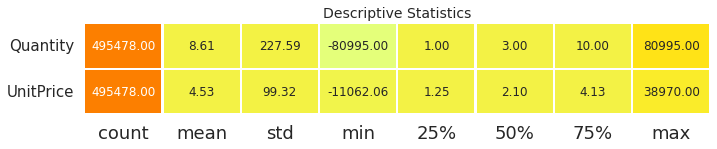

In [ ]:
#tibs for change table designe

def  magic_taple(dataframe):
  tap=dataframe.describe().T
  
  tap_df= pd.DataFrame(index = dataframe.columns,
                        columns= tap.columns,
                        data=tap)
  print(tap_df.shape[0]*0.78)
  f,ax =plt.subplots(figsize=(10 ,
                              tap_df.shape[0]*0.78))#
  sns.heatmap(tap_df,
              ax=ax,
              linecolor='white',
                linewidths = 1.3,
              annot=True,
              cmap="Wistia",#colour of table              
              fmt='.2f',#
              cbar=False,
              
              annot_kws={"size": 12}
                )


  plt.xticks(size = 18)
  plt.yticks(size = 15, rotation = 0)
  plt.title("Descriptive Statistics", size = 14)
  plt.show()                             



 # display Discrabtion   
magic_taple(df1[[col for col in df1.columns if df1[col].dtype != 'O' 
                 and df1[col].dtype !='datetime64[ns]']])  

In [ ]:
# gives some infos on columns types and numer of null values
#4 type of feature
info=pd.DataFrame(df1.dtypes).T.rename(index={0:'column type'})
#5 no of null in data
info=info.append(pd.DataFrame(df1.isnull().sum()).T.rename(index={0:'number of null'}))
info=info.append(pd.DataFrame((df1.isnull().sum())/df1.shape[0]*100).T.rename(index={0:'precent of null(%)'}))
display(info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
number of null,0,0,1454,0,0,0,133600,0
precent of null(%),0.0,0.0,0.293454,0.0,0.0,0.0,26.963861,0.0


While looking at the number of null values in the dataframe, it is interesting to note that ∼ 27% of the entries are not assigned to a particular customer. With the data available, it is impossible to impute values for the user and these entries are thus useless for the current exercise. So I delete them from the dataframe:

In [ ]:
#7)for delet null values using dropna  361878 rows × 8 columns
df1.dropna(axis=0 , subset=['CustomerID'],inplace=True)
print('DataFrame Shape :', df1.shape)
print('Number of rows :',df1.shape[0])
print('Number of columns :', df1.shape[1])

DataFrame Shape : (361878, 8)
Number of rows : 361878
Number of columns : 8


In [ ]:
# gives some infos on columns types and numer of null values
# again repeate 4 type of feature
info=pd.DataFrame(df1.dtypes).T.rename(index={0:'column type'})
#5 no of null in data
info=info.append(pd.DataFrame(df1.isnull().sum()).T.rename(index={0:'number of null'}))
info=info.append(pd.DataFrame((df1.isnull().sum())/df1.shape[0]*100).T.rename(index={0:'precent of null(%)'}))
display(info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
number of null,0,0,0,0,0,0,0,0
precent of null(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


by removing these entries we end up with a dataframe filled at 100% for all variables! Finally, I check for duplicate entries and delete them:

In [ ]:
#8 duplicated
print('numbers of dublicate entries: {}'.format(df1.duplicated().sum()))
df1.drop_duplicates(inplace=True)

numbers of dublicate entries: 5150


In [ ]:
df1.to_csv('/content/2010before_canceling', index=False, )# saving the dataframe

# 2. Exploring the Data

In [ ]:
df_2010_2011=pd.read_csv('/content/2010after_cleaning', encoding= 'unicode_escape')#1
df1 = df_2010_2011.copy()

### **Variable Description**


**InvoiceNo:**  **Invoice** number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product code that consists 5 digits.
**Description:** Product name.
**Quantity:** The quantities of each product per transaction.
**InvoiceDate:** Represents the day and time when each transaction was generated.
**UnitPrice:** Product price per unit.
CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.
**Country:** Name of the country where each customer resides.


In [ ]:
df1.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,Egypt


In [ ]:

info=pd.DataFrame(df1['StockCode'].unique()).count().rename(index={0:'number of product'})
info=info.append(pd.DataFrame(df1['InvoiceNo'].unique()).count().rename(index={0:'number of transactions'}))
info=info.append(pd.DataFrame(df1['CustomerID'].unique()).count().rename(index={0:'number of Customer'}))
info=info.append(pd.DataFrame(df1['Description'].unique()).count().rename(index={0:'number of Description'}))
info =pd.DataFrame(info)#.T
display(type(info), info);

pandas.core.frame.DataFrame

,0
number of product,3661
number of transactions,19857
number of Customer,3950
number of Description,3860


seem we have 3950 customer and that thy bought 3661 different product,
with total number of transactions is 19857 

محاوله لي فهم البيانات و لو محلتهاش شلها

أزاي عدد ستوكود اكبر من عدد description of product

In [ ]:
a=pd.DataFrame(df1['Description'].unique())

appiled_df = a.apply(lambda cell: [cell for cell in a[0] if len(cell) <= 8
                                  ] , axis='rows', result_type='expand')
display(appiled_df)

a=pd.DataFrame(df1['StockCode'].unique())

appiled_df = a.apply(lambda cell: [cell for cell in a[0] if len(cell) <= 4
                                  ] , axis='rows', result_type='expand')
display(appiled_df)

,0
0,Discount
1,Manual
2,POSTAGE
3,CARRIAGE


,0
0,D
1,M
2,POST
3,C2
4,PADS
5,DOT
6,CRUK


In [ ]:
#split description of product about different discount in description 
lists_product=[]
list_discount=[]

#rpush_description=df1[df1['Description']==df1['Description'].unique()]

### ***Cancelled Orders & Quantity***


In [ ]:
# new column Total price
df1['Totalprice']=df1['Quantity']*df1['UnitPrice']
##########################################################
df=df1[df1["InvoiceNo"].str.contains('C',na=False)] #result empty df
df_negatv_Quantity = df1[df1["Quantity"] < 0]
print('number of cancelled order =',df_negatv_Quantity.shape[0])
###########################################################################
df_without_negative= df1[df1["Quantity"] > 0]
df_without_negative.shape[0]

number of cancelled order = 7501


349227

3.12


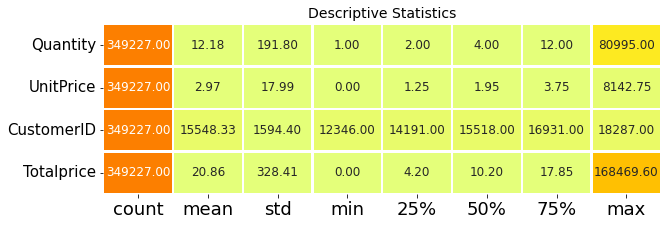

In [ ]:

 # display Discrabtion  without canceled order 
magic_taple(df_without_negative[[col for col in df_without_negative.columns if df_without_negative[col].dtype != 'O' 
                 and df_without_negative[col].dtype !='datetime64[ns]']])  

3.12


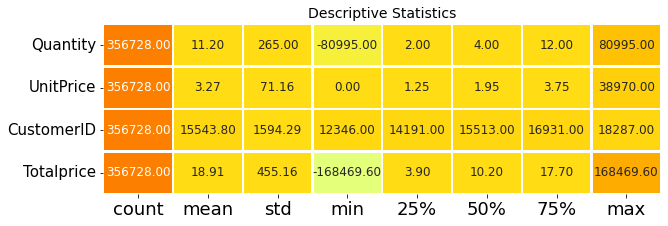

In [ ]:
 # display Discrabtion  with  Cancelled Orders
magic_taple(df1[[col for col in df1.columns if df1[col].dtype != 'O' 
                 and df1[col].dtype !='datetime64[ns]']]) 

In [ ]:
df1.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,Egypt,15.3


سوف احسب عدد المنتاجات المباعه في كل معاملة

In [ ]:
#find number of products purchased in every transaction:
inform=df1.groupby(["CustomerID",'InvoiceNo'],as_index=False)['StockCode'].count()  
no_products_per_basket=inform.rename(columns={'StockCode':'Number of products'})
no_products_per_basket[:5].sort_values('CustomerID') 

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12747,537215,7
3,12747,538537,8
4,12747,541677,5


In [ ]:
#no_products_per_basket['order_canceled'] =no_products_per_basket["InvoiceNo"].str.contains('C',na=False)
no_products_per_basket['order_canceled']=no_products_per_basket['InvoiceNo'].apply(lambda x:int('C'in x))
display(no_products_per_basket[:5])
#________________________________
n1=no_products_per_basket['order_canceled'].sum()#(5row/100row)*100=5%
n2 = no_products_per_basket.shape[0]#no_row
print('number of ordercanceled: {}/{}({:.1f}% of the total number of transactions) '.format(n1,n2,n1/n2*100))


,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346,541431,1,0
1,12346,C541433,1,1
2,12747,537215,7,0
3,12747,538537,8,0
4,12747,541677,5,0


number of ordercanceled: 3208/19857(16.2% of the total number of transactions) 


locate the entries that indicate a negative quantity and check if there is systematically an order indicating the same quantity (but positive), with the same description (CustomerID, Description and UnitPrice):

### **this section can be deleted.**

In [ ]:
#delete if not usefull
#df_check =df1[df1['Quantity']<0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
#df_check

In [ ]:
display(df1.sort_values('CustomerID')[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice
33655,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,Egypt,-77183.6
33650,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,Egypt,77183.6
353402,581163,23581,JUMBO BAG PAISLEY PARK,10,2011-12-07 14:34:00,2.08,12747,Egypt,20.8
108970,551992,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-05-05 15:31:00,2.95,12747,Egypt,17.7
108971,551992,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,12,2011-05-05 15:31:00,1.65,12747,Egypt,19.8


In [ ]:
import pandas as pd

data = {
  "firstname": ["Sally", "Mary", "John"],
  "age": [50, 40, 30]
}

df = pd.DataFrame(data)
print(df)
for index, row in df.iterrows():
  print(index ,"\n", row)


  firstname  age
0     Sally   50
1      Mary   40
2      John   30
0 
 firstname    Sally
age             50
Name: 0, dtype: object
1 
 firstname    Mary
age            40
Name: 1, dtype: object
2 
 firstname    John
age            30
Name: 2, dtype: object


نلاحظ من الخطوة السابقة ان  عند  الغاء الطلب يتم اضافة معامله جديد  مطابقة للطلب الاول مع الاختلاف في رقم الفاتور  يحوي علي حر c  
و بالاضافة ان

Quantity is negative

للتحقق من ذلك

In [ ]:
df_check=df1[df1['Quantity']<0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
df_check.head()

,CustomerID,Quantity,StockCode,Description,UnitPrice
121,14527,-1,D,Discount,27.50
134,15311,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65
201,17548,-12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65
202,17548,-24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29
203,17548,-24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29


HYPOTHESIS is all row in df-check 'canceled order" be exist in df with little bit difference "

**all canceled order repeat with alittle bit difference**

In [ ]:
df_check=df1[df1['Quantity']<0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
c=0
#ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all() <===> if df : 
#TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]<===>if df[() & () & ()].
for index, col in  df_check.iterrows():#col list contain info of roe check
  if df1[ (df1['CustomerID']==col[0]) & (df1['StockCode']==col[2]) & (df1['Quantity']== -col[1]) ].shape[0] == 0 :# True if result filter not empty
    print(df_check.loc[index])
    print(15 * '=' +'>' + ' HYPOTHESIS NOT FULFILLED ' )
    break  

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 121, dtype: object
===============> HYPOTHESIS NOT FULFILLED 


HYPOTHESIS NOT FULFILLED becouse of all transaltion  stockcode==D  must always Quantity==-ve  therefore 
df1['Quantity']== -col[1]) = F ==>
df1.shape[0]==0 ==>T 

so I repeat HYPOTHESIS after remove discount

طوال ما ماليان يبقي مش هيطبع 

لما يكون فاضي هيطبع  هيطبع العنصر الي ملقاش نظير ليه في df1

In [ ]:
df_check = df1[(df1['Quantity'] < 0) & (df1['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():#col list contain info of roe check
  if df1[ (df1['CustomerID']==col[0]) & (df1['StockCode']==col[2]) & (df1['Quantity']== -col[1]) ].shape[0] == 0 :# True if result filter not empty
    print(df_check.loc[index])
    print(15 * '=' +'>' + ' HYPOTHESIS NOT FULFILLED ' )
    break 


CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 134, dtype: object
===============> HYPOTHESIS NOT FULFILLED 


In [ ]:
t1= df1[(df1['Quantity'] < 0) & (df1['CustomerID'] == 15311)][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice','InvoiceDate']]
t1

,CustomerID,Quantity,StockCode,Description,UnitPrice,InvoiceDate
134,15311,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65,2010-12-01 09:49:00
11075,15311,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65,2010-12-08 13:18:00
11076,15311,-2,40001,WHITE BAMBOO RIBS LAMPSHADE,0.64,2010-12-08 13:18:00
11077,15311,-1,85047,WHITE BEADED GARLAND STRING 20LIGHT,5.55,2010-12-08 13:18:00
11078,15311,-3,22719,GUMBALL MONOCHROME COAT RACK,1.06,2010-12-08 13:18:00
...,...,...,...,...,...,...
309781,15311,-1,21929,JUMBO BAG PINK VINTAGE PAISLEY,1.79,2011-11-15 13:22:00
309782,15311,-2,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,1.79,2011-11-15 13:22:00
337631,15311,-4,23169,CLASSIC GLASS COOKIE JAR,3.75,2011-11-29 12:52:00
350936,15311,-5,21258,VICTORIAN SEWING BOX LARGE,10.95,2011-12-06 12:25:00


### New Section

I decide to remove command has been canceled

In [ ]:
df_cleaned1=df1.copy()
df_cleaned1['QuantityCanceled']=0
EntryRemove=[] ;  EnterDoubtfull=[] ;df_test=[]
for index ,col in df1.iterrows():
  # maybe stockcode==D but Quantity=-ve
  if (col['Quantity'] > 0) or col['StockCode']=='D':
    continue
    df_test =df1[(df1['CustomerID']==col['CustomerID']) & (df1['StockCode']==col['StockCode'])& (df1['CustomerID']==col['CustomerID'])
                  & (df1['InvoiceDate'] < col['InvoiceDate']) & (df1['Quantity']> 0)].copy


In [ ]:
for index, col in  df1.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df1[(df1['CustomerID'] == col['CustomerID']) &
                         (df1['StockCode']  == col['StockCode']) & 
                         (df1['InvoiceDate'] < col['InvoiceDate']) & 
                         (df1['Quantity']   > 0)].copy()
    
    #الطلبات الملغاه بدون وجود  انها اطلبة في البيانات غالبا بتكون بيانات من قبل 2010
    #ever iteration df still empty add the index
    if(df_test.shape[0]==0):
      EnterDoubtfull.append(index)#index is variable
    #==============================================
    #الطلبات الملغاه مع صدور فاتورة طلب ليها
    elif (df_test.shape[0]==1):
      index_order==df.index[0]
      df_cleaned1.loc[index_order, 'QuantityCanceled']=-col['Quantity']
      EntryRemove.append(index)
      #=======================================================================
      #حذف فاتورة الغاء التي يوجد فاتورة طلب لها 
    elif (df_test.shape[0]>1) :
      df_test.sort_index(axis=0, ascending=False,inplace=True)
      for ind ,val in  df_test.iterrows(): #the big is last "index of canceled"
        if val['Quantity'] <-col['Quantity']: #Iwant val= col=>-ve < -(-ve)
          df_cleaned1.loc[ind, 'QuantityCanceled']= -col['Quantity']
          EntryRemove.append(index)
          break


      







In [ ]:
print("entry_to_remove: {}".format(len(EntryRemove)))
print("doubtfull_entry: {}".format(len(EnterDoubtfull)))



entry_to_remove: 4380
doubtfull_entry: 1124


In [ ]:
EntryRemove

[879,
 2556,
 2882,
 3492,
 3493,
 4288,
 4548,
 5816,
 6059,
 6483,
 7468,
 8070,
 8429,
 8548,
 8549,
 8550,
 8551,
 8552,
 8553,
 8611,
 8612,
 8613,
 8614,
 8621,
 8622,
 9253,
 9279,
 9283,
 9286,
 9292,
 9471,
 9910,
 10063,
 10064,
 11075,
 11078,
 11111,
 11112,
 11113,
 11114,
 11176,
 11335,
 11336,
 11571,
 11572,
 11573,
 11574,
 11575,
 11613,
 11614,
 12501,
 12737,
 12738,
 12819,
 12847,
 12848,
 12891,
 12892,
 12910,
 12945,
 14240,
 14264,
 14269,
 14271,
 14274,
 14276,
 14278,
 14279,
 14281,
 14310,
 14386,
 14543,
 14869,
 14870,
 15307,
 15400,
 16039,
 16090,
 16821,
 17205,
 17237,
 17238,
 17239,
 17240,
 17241,
 17242,
 17243,
 17244,
 17245,
 17249,
 17251,
 17252,
 17254,
 17388,
 17438,
 17440,
 17461,
 17520,
 17521,
 17528,
 17531,
 17532,
 17571,
 17600,
 17692,
 17693,
 18022,
 18024,
 18687,
 18756,
 18757,
 19965,
 19972,
 19974,
 19975,
 19976,
 19977,
 19978,
 19979,
 19981,
 19982,
 20438,
 20784,
 20896,
 20897,
 20917,
 20979,
 21112,
 21117,
 

In [ ]:
EnterDoubtfull

[134,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 1259,
 1260,
 1827,
 2066,
 2330,
 2548,
 2549,
 2881,
 2900,
 2901,
 3391,
 3392,
 3408,
 3409,
 3410,
 3411,
 3412,
 3413,
 3431,
 3432,
 3433,
 3434,
 3435,
 3436,
 3437,
 3438,
 3439,
 3457,
 3458,
 3459,
 3460,
 3484,
 3485,
 3490,
 3491,
 3494,
 3495,
 3496,
 3497,
 3768,
 3769,
 3770,
 3771,
 3772,
 3788,
 3789,
 3790,
 3791,
 3792,
 4287,
 4289,
 4691,
 4692,
 4693,
 4771,
 4772,
 5453,
 5454,
 5455,
 5456,
 5457,
 5458,
 6484,
 7118,
 7469,
 8037,
 8149,
 8150,
 8151,
 8651,
 8652,
 8653,
 8654,
 8852,
 8927,
 8928,
 9168,
 9169,
 9170,
 9280,
 9281,
 9282,
 9285,
 9287,
 9288,
 9289,
 9290,
 9291,
 10009,
 10269,
 10270,
 10271,
 10305,
 10306,
 10307,
 10370,
 10867,
 10868,
 11011,
 11012,
 11013,
 11014,
 11076,
 11077,
 11079,
 11080,
 11081,
 11082,
 11083,
 11125,
 11126,
 11177,
 11208,
 11209,
 11338,
 11339,
 11340,
 11341,
 11357,
 11642,
 11643,
 11644,
 11645,
 11646,
 11647,
 11648,
 11649,
 11650,
 11651,
 11652,


In [ ]:
#using filter to delet index
df_cleaned1.drop(EntryRemove, axis=0,inplace=True)
df_cleaned1.drop(EnterDoubtfull, axis=0,inplace=True)


KeyError: ignored

In [ ]:
#========================================================
Entries_remain=df_cleaned1[(df_cleaned1['Quantity'] <0) & (df_cleaned1['StockCode'] !='D')]

print(f"number of entrie that remove it :{Entries_remain.shape[0]}")
Entries_remain[:5]

number of entrie that remove it :1923


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,QuantityCanceled
8641,C537413,22834,HAND WARMER BABUSHKA DESIGN,-72,2010-12-06 15:07:00,2.10,14409,Egypt,-151.20,0
9284,C537602,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-12-07 12:45:00,2.55,17511,Egypt,-2.55,0
11334,C537832,22073,RED RETROSPOT STORAGE JAR,-2,2010-12-08 14:52:00,3.75,16858,Egypt,-7.50,0
14263,C538341,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,-1,2010-12-10 14:03:00,1.25,15514,Egypt,-1.25,0
14265,C538341,22988,SOLDIERS EGG CUP,-12,2010-12-10 14:03:00,1.25,15514,Egypt,-15.00,0


In [ ]:

df_cleaned1.drop(Entries_remain.index, axis=0,inplace=True)

In [ ]:
Entries_remain=df_cleaned1[(df_cleaned1['Quantity'] <0) & (df_cleaned1['StockCode'] !='D')]
print(f"number of entrie that remove it :{Entries_remain.shape[0]} ")
df_cleaned1.shape

number of entrie that remove it :0 


(349301, 10)

###StockCode

I check values of the **StockCode** variable indicate a particular transaction (i.e. D for Discount)

In [ ]:
special_stockcode=pd.DataFrame(df1[df1['StockCode'].str.contains('^[a-zA-Z]+',regex=True)]['StockCode'].unique())
for c in special_stockcode[0]:
  print("{:<12} -> {}" . format(c ,df1[df1['StockCode']==c]['Description'].unique()))
  

D            -> ['Discount']
M            -> ['Manual']
BANK CHARGES -> ['Bank Charges']
POST         -> ['POSTAGE']
C2           -> ['CARRIAGE']
PADS         -> ['PADS TO MATCH ALL CUSHIONS']
DOT          -> ['DOTCOM POSTAGE']
CRUK         -> ['CRUK Commission']


 Calculate the amount of the invoice
 **(Basket Price)**

In [ ]:
df_cleaned1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,Egypt,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,Egypt,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,Egypt,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,Egypt,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,Egypt,20.34,0


In [ ]:
temp=df_cleaned1.groupby(['CustomerID','InvoiceNo'],as_index=False)['Totalprice'].sum()
basket_price = temp.rename(columns = {'Totalprice':'Basket Price'})
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price
0,12346,541431,77183.60
10,12747,577104,312.73
9,12747,569397,675.38
8,12747,563949,301.70
7,12747,558265,376.30
6,12747,554549,328.35


In [ ]:
price_range=[0,50,100,200,500,1000,5000,50000]
count_price=[]
for i , price in enumerate(price_range):
  if i==0: continue
  trans=basket_price[(basket_price['Basket Price']<price) & (basket_price['Basket Price']>price_range[i-1])]['Basket Price'].count()
  #print(trans)
  count_price.append(trans)

In [ ]:
label=['{}<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
data = [go.Pie(labels=label, 
                   values=count_price)]

layout = go.Layout(title="Distribution of order's price ", title_x=0.5)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
df_cleaned1.to_csv('/content/2010after_cleaningv2', index=False, )# saving the dataframe

# Insight on product categories 

In [ ]:
df_2010_2011=pd.read_csv('/content/2010after_cleaningv2', encoding= 'unicode_escape')#1
df_cleaned1 = df_2010_2011.copy()

I intent to use Description variable in order to group the progucts into different categories

NN	noun, singular 'desk'

NNS	noun plural	'desks'

NNP	proper noun, singular	'Harrison'

NNPS	proper noun, plural	'Americans'


In [ ]:
#1 extract information from Description by divided Description into word 
#and word=> stemm of word and add tag to each word and see word most frequnce in data 
#The function is_noun tests input is a noun or no.
is_noun=lambda pos : pos[0:2]=='NN'
def key_stocking(df,colomn='Description'):
  stemmer=nltk.stem.SnowballStemmer("english")
  #store dict(words: root)
  keywords_roots=dict()
  #association:root and keyword
  keywords_select=dict()
  category_keys =[]
  count_keyword=dict()
  icount=0 
  for s in df[colomn]:
    if pd.isnull(s):continue
    line=s.lower()
    #start slice word from sentanse
    tokenized= nltk.word_tokenize(line)
    noun =[word for (word ,pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
    #print(noun) #noun is list[word is noun]


    for t in noun :
      t=t.lower();#be carefull t= one word from description
      stem_word=stemmer.stem(t)
      if stem_word in keywords_roots:
        #keywords_roots[racine].add(t)
        count_keyword[stem_word] +=1
      else:
        keywords_roots[stem_word]=  {t}
        count_keyword[stem_word]=1

       #aggregate the set of names associated with this particular root
  for s in keywords_roots.keys() :
     #s=key
     if len(keywords_roots[s])>1:
        #value>1
        min_lenght=1000
        for k in keywords_roots[s]:
           #k =values of key
           if len(k)<min_lenght:
             clef=k;# value of key
             min_lenght=len(k) #not every values in clef but first value then smaler len(v2)
        #end for
        category_keys.append(clef)
        keywords_select[s]=clef #dict{key=s:clef}

     else:
        category_keys.append(list (keywords_roots[s])[0])
        keywords_select[s]=list(keywords_roots[s])[0]

  print("number of keywords in description variable '{}':{}".format(colomn,len(category_keys)))
  
  return category_keys,keywords_roots,keywords_select,count_keyword


In [ ]:
df_products = pd.DataFrame(df_cleaned1['Description'].unique()).rename(columns = {0:'Description'})

 I use the function
  key_stocking(df,colomn='Description')
  
 I previously defined in order to analyze the description of the various products:

In [ ]:
category_keys,keywords_roots,keywords_select,count_keyword = key_stocking(df_products)

number of keywords in description variable 'Description':1476


The execution of this function returns three variables:

keywords: the list of extracted keywords

keywords_roots: a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots

count_keywords: dictionary listing the number of times every word is used

 I convert the count_keywords dictionary into a list, 
to sort the keywords according to their occurences:

In [ ]:
# dictionary.items()==>[(key,value)]
list_products=[]
for k,v in count_keyword.items():
  list_products.append([keywords_select[k],v])

list_products.sort(key=lambda x:x[1] ,reverse= True)
list_products[:100]

[['heart', 265],
 ['vintage', 210],
 ['set', 206],
 ['pink', 184],
 ['bag', 161],
 ['boxes', 153],
 ['glass', 148],
 ['christmas', 136],
 ['design', 127],
 ['candle', 120],
 ['holder', 119],
 ['flowers', 119],
 ['decoration', 108],
 ['metal', 99],
 ['retrospot', 90],
 ['card', 90],
 ['paper', 84],
 ['necklace', 82],
 ['blues', 80],
 ['art', 75],
 ['silver', 71],
 ['cake', 69],
 ['cover', 68],
 ['polkadot', 67],
 ['mugs', 66],
 ['tin', 66],
 ['wrap', 65],
 ['sign', 64],
 ['pack', 61],
 ['egg', 61],
 ['bracelet', 60],
 ['star', 59],
 ['bowl', 56],
 ['wall', 55],
 ['tea', 54],
 ['garden', 54],
 ['mini', 54],
 ['cushion', 54],
 ['ivory', 53],
 ['frame', 52],
 ['mirror', 50],
 ['home', 49],
 ['gift', 48],
 ['cream', 45],
 ['bird', 45],
 ['ring', 45],
 ['earrings', 45],
 ['clock', 44],
 ['bottle', 43],
 ['paisley', 42],
 ['letters', 42],
 ['party', 42],
 ['wood', 40],
 ['ribbons', 40],
 ['charm', 40],
 ['jars', 39],
 ['easter', 39],
 ['garland', 38],
 ['hook', 38],
 ['gold', 38],
 ['bead', 3

In [ ]:
# I create a representation of the most common keywords:
list_products = sorted(list_products, key = lambda x:x[1], reverse = False)
df_list_products=pd.DataFrame(list_products)

data = go.Bar(y =df_list_products.iloc[-125:, 0],
              x = df_list_products.iloc[-125:, 1], 
             
              orientation='h')

layout = go.Layout(title={'text': "Words occurence",
                          
                          'y':0.9,
                          'x':0.9,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis =dict(title='occurence'),
                   yaxis =dict(title='product'),
                   template = 'plotly_white',
                   autosize=True,

                   height=850,
                   font=dict(family='Arial', size=14, color='rgba(50, 171, 96)')
                   )

fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(range=[0,280])
iplot(fig)

In [ ]:
list_product=[]
for k,v in count_keyword.items():
  word =keywords_select[k]
  if word in ['pink','blue','tag', 'green', 'orange']:
    continue
  if len(word)< 3  or v<13:
    continue  
  if ('+'in word) or ('/' in word) :
    continue
  list_product.append([word ,v])
  #__________________________________

list_product.sort(key = lambda x:x[1], reverse = True)
print('reserved words :',len(list_product))


reserved words : 191


##**Data encoding**

> Indented block



Now I will use these keywords to create groups of product.

The  X  matrix indicates the words contained in the description of the products using the

 ***one-hot-encoding principle***.

 https://www.sciencedirect.com/topics/computer-science/one-hot-encoding

In [ ]:
Descrip_unique=df_cleaned1['Description'].unique()
X=pd.DataFrame()
for key , occurence in list_product:
  X.loc[:,key]=list(map(lambda x:int(key.upper() in x ),Descrip_unique))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



 I have found that introducing the price range results in more balanced groups in terms of element numbers. Hence, I add 6 extra columns to this matrix, where I indicate the price range of the products

In [ ]:
#create 6 empty columns
threshold=[0,1,2,3,5,10]
label_col=[]
for i in range(len(threshold)):
  if i== len(threshold)-1:
     col='.>{}'.format(threshold[i])
  else:
     col= '{}< < {}'.format(threshold[i],threshold[i+1])

  label_col.append(col)
  X.loc[:, col] = 0    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
for i ,prod in enumerate(Descrip_unique):
    prix=df_cleaned1[df_cleaned1['Description']==prod]['UnitPrice'].mean()#prix=2.08 for 
    j=0
    #each price<0 in com1 $<1 in c2 &<2 in c3==>threshold[2]
    while prix >threshold[j]:
         j+=1
         if j ==len(threshold):break
    X.loc[i,label_col[j-1]]=1     

X


,heart,vintage,set,bag,boxes,glass,christmas,design,candle,holder,...,lace,pan,wallet,point,0< < 1,1< < 2,2< < 3,3< < 5,5< < 10,.>10
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3842,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3843,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#check the number of products in the different groups:
print("{:<10} {} \n".format('column','number of product ')+10*' ~ ')
for i in range(len(threshold)):
    if i== len(threshold)-1:
       col='.>{}'.format(threshold[i])
    else:
       col= '{}< < {}'.format(threshold[i],threshold[i+1])

    print("{:<10} {}".format(col , X.loc[:, col].sum()))   




column     number of product  
 ~  ~  ~  ~  ~  ~  ~  ~  ~  ~ 
0< < 1     969
1< < 2     997
2< < 3     652
3< < 5     603
5< < 10    468
.>10       156


In [ ]:
X.head()



,heart,vintage,set,bag,boxes,glass,christmas,design,candle,holder,...,lace,pan,wallet,point,0< < 1,1< < 2,2< < 3,3< < 5,5< < 10,.>10
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X.to_csv('/content/2010_product_scaler', index=False, )# saving the dataframe

# **Creating clusters of products**

In [ ]:
product_scaler2010=pd.read_csv('/content/2010_product_scaler', encoding= 'unicode_escape')#1
X= product_scaler2010.copy()
df_2010_2011=pd.read_csv('/content/2010after_cleaningv2', encoding= 'unicode_escape')#1
df_cleaned1 = df_2010_2011.copy()

In [ ]:
X

,heart,vintage,set,bag,boxes,glass,christmas,design,candle,holder,...,lace,pan,wallet,point,0< < 1,1< < 2,2< < 3,3< < 5,5< < 10,.>10
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3842,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3843,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_cleaned1[df_cleaned1['InvoiceNo']=='C536379']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,QuantityCanceled
121,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527,Egypt,-27.5,0


In [ ]:
matrix
X

,heart,vintage,set,bag,boxes,glass,christmas,design,candle,holder,...,lace,pan,wallet,point,0< < 1,1< < 2,2< < 3,3< < 5,5< < 10,.>10
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3842,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3843,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
matrix =X
y_inertia=[]
k = [3,4,5,6,7,8,9,10]
for num_clusters in k:
  km = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
  clusters = km.fit_predict(matrix)
  #========================================================================#
  #silhouette_score
  silhouette_avg = silhouette_score(matrix, clusters)
  print("############################################################## \n ""For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg,
        "\n ############################################################## \n ")
  #========================================================================#
  y_inertia.append(km.cost_)

#==========================================================================#
#Elbow Method
data = go.Scatter(x=k, y=y_inertia ,mode='lines+markers',marker=dict(size=10))

layout = go.Layout(title={'text': "Elbow Method",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   width=650,
                   height=470,
                   xaxis = dict(title='Number of Clusters'),
                   yaxis =dict(title='Sum of Squared Distance'),
                   template = 'plotly_white')

fig =go.Figure(data=data,layout=layout)
iplot(fig)

    For n_clusters = 6 The average silhouette_score is : 0.14853655765805593

The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.


The aspects to look out for in Silhouette plots are cluster scores below the 

**average silhouette score,** 

**wide fluctuations in the size of the clusters,** and also

**the thickness of the silhouette plot.**


In [ ]:
matrix=X
n_clusters = 6
silhouette_avg = -1
while silhouette_avg <= 0.160:
    
    km =KModes(n_clusters = n_clusters, init='Huang', n_init=3, verbose=0)
    clusters = km.fit_predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

In [ ]:
#We can now save this using the pickle module:

import pickle

# It is important to use binary access
with open('km.pickle', 'wb') as f:
    pickle.dump(km, f)

In [ ]:
#To read back the object, use
with open('km.pickle', 'rb') as f:
    km = pickle.load(f)

In [ ]:
km

In [ ]:
clusters = km.fit_predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    For n_clusters = 6 The average silhouette_score is : 0.15893784621553303

    For n_clusters = 6 The average silhouette_score is : 0.16931724382502025
    

In [ ]:
matrix=X
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.164:
    
    km =KModes(n_clusters = n_clusters, init='Huang', n_init=3, verbose=0)
    clusters = km.fit_predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

In [ ]:
silhouette_avg

In [ ]:
clusters=pd.DataFrame(clusters)
clusters.to_csv('/content/2010_product_clustersv2', index=False, )# saving the dataframe
silhouette_avg.to_csv('/content/2010_product_clustersv2', index=False, )# saving the dataframe
clusters

### load data after cleaning 

In [ ]:

df_2010_2011=pd.read_csv('/content/2010after_cleaningv2',  encoding= 'unicode_escape',
                         dtype={'CustomerID':str ,'InvoiceNo': str})#1
df_cleaned1 = df_2010_2011.copy()
df_cleaned1['InvoiceDate']=pd.to_datetime(df_cleaned1['InvoiceDate'])#3

In [ ]:
product_clusters2010=pd.read_csv('/content/2010_product_clustersv1', encoding= 'unicode_escape')#1
clusters= product_clusters2010.copy()
product_Scale2010=pd.read_csv('/content/2010_product_scaler', encoding= 'unicode_escape')#1
X= product_Scale2010.copy()
X

,heart,vintage,set,bag,boxes,glass,christmas,design,candle,holder,...,lace,pan,wallet,point,0< < 1,1< < 2,2< < 3,3< < 5,5< < 10,.>10
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3842,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3843,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#the number of elements in every class:
clusters.value_counts()


0
2    997
1    969
3    652
0    603
5    468
4    156
dtype: int64

In [ ]:
import matplotlib as mpl
from plotly import tools


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
n_clusters=6
#create a subplot with 1row and 2columns
figuree=tools.make_subplots(rows=1,cols=2,
                            print_grid=False,
                            subplot_titles=('The silhouette plot for the various clusters.',
                                              'The visualization of the clustered data.')
                            )

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
figuree['layout']['xaxis1'].update(title='The silhouette coefficient values',
                                   range=[-0.1, 1])
#####################################################################################

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
figuree['layout']['yaxis1'].update(title='Cluster label',
                                showticklabels=False,
                                range=[0, len(X) + (n_clusters + 1) * 10])
#============================================================================


# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, clusters)
y_lower = 10

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:464: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
clusters=pd.DataFrame(clusters)
clusters==0

,0
0,False
1,True
2,True
3,True
4,True
...,...
3840,False
3841,False
3842,False
3843,False


In [ ]:
for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters.index== i]
        print(ith_cluster_silhouette_values)

[0.12141094]
[0.18519541]
[0.10508584]
[0.14301553]
[0.1656564]
[0.11266854]


In [ ]:
ith_cluster_silhouette_values

array([0.11266854])

In [ ]:
clusters['0']

0       3
1       0
2       0
3       0
4       0
       ..
3840    1
3841    1
3842    3
3843    3
3844    3
Name: 0, Length: 3845, dtype: int64

In [ ]:
print(clusters.index)

RangeIndex(start=0, stop=3845, step=1)


In [ ]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values,silhouette_avg, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters== i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ############################################################################################
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



For n_clusters = 6 The average silhouette_score is : 0.16931724382502025


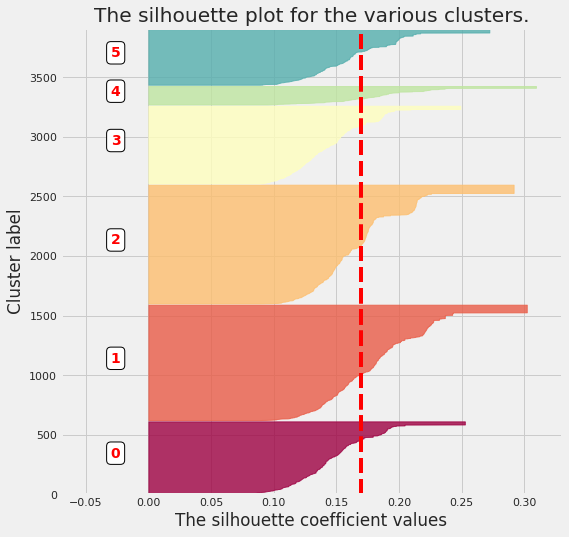

In [ ]:
n_clusters=6
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(X, clusters)
silhouette_avg = silhouette_score(X, clusters['0'])
#__________________
# and do the graph

graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values,silhouette_avg, clusters['0'])

##Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
List=pd.DataFrame(Descrip_unique)
#list 191 word most occurence
list_word=[word for (word,occurence)in list_product]

occurence=[dict() for _ in range(n_clusters)]
#aggregation all description following to cluster_label
for i in range(n_clusters):
  list_cluster=List.loc[clusters["0"]==i]
  for word in list_word:
    if word in ['art', 'set','heart','pink','blue','tag']:
      continue
    #each word occurence in your cluster how many?  
    occurence[i][word]=sum(list_cluster.loc[:,0].str.contains(word.upper()))
  
print(len(occurence))
occurence[0]

6


{'alphabet': 1,
 'antique': 7,
 'apple': 3,
 'babushka': 7,
 'bag': 21,
 'ball': 3,
 'baroque': 5,
 'baskets': 0,
 'bathroom': 6,
 'bead': 14,
 'bell': 7,
 'bird': 10,
 'birthday': 1,
 'biscuit': 4,
 'blues': 0,
 'book': 14,
 'bottle': 23,
 'bowl': 9,
 'boxes': 2,
 'bracelet': 35,
 'bunnies': 0,
 'butterfly': 10,
 'cabinet': 2,
 'cake': 15,
 'candle': 28,
 'card': 6,
 'cases': 0,
 'cat': 5,
 'charm': 3,
 'cherry': 6,
 'chick': 1,
 'childrens': 9,
 'childs': 1,
 'chocolate': 5,
 'christmas': 11,
 'clock': 8,
 'coaster': 0,
 'coffee': 5,
 'colour': 7,
 'cottage': 1,
 'cover': 35,
 'cream': 14,
 'crystal': 13,
 'cup': 2,
 'cushion': 29,
 'cutlery': 13,
 'daisy': 2,
 'decoration': 3,
 'design': 11,
 'diamante': 9,
 'diner': 0,
 'dinner': 6,
 'dish': 3,
 'dog': 5,
 'doiley': 2,
 'doilies': 0,
 'door': 6,
 'doormat': 0,
 'drawer': 2,
 'drop': 8,
 'earrings': 21,
 'easter': 3,
 'egg': 1,
 'enamel': 12,
 'fairy': 7,
 'feltcraft': 13,
 'flock': 3,
 'flowers': 2,
 'food': 10,
 'frame': 13,
 'fru

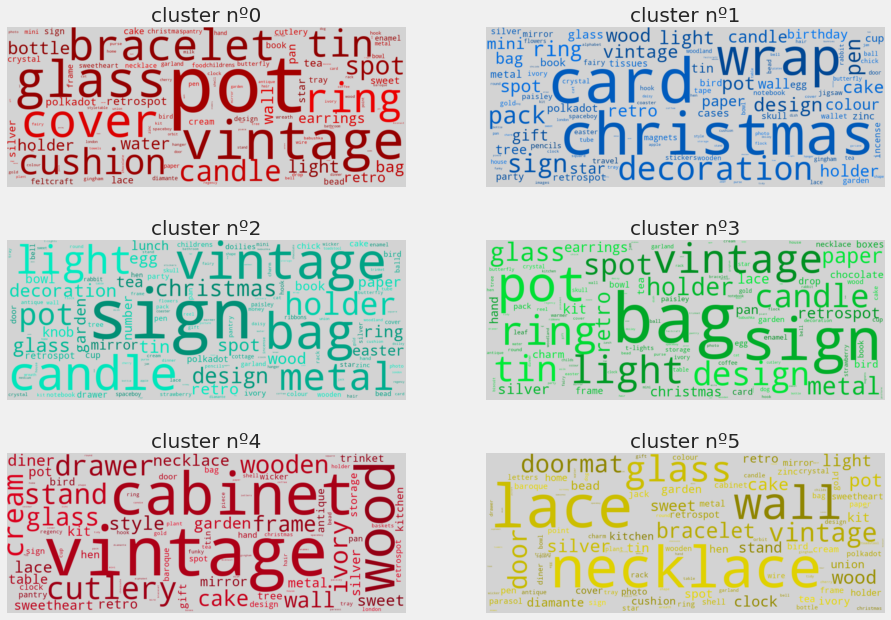

In [ ]:
# I represent previosly result as wordclouds
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))
#_________________________________
fig =plt.figure(1,figsize=(14,14))
color=[0,150 ,120 ,95 ,250 ,40 ,360 ,160 ,25]
for i in range(n_clusters):
  list_cluster_occurences = occurence[i]
  tone=color[i]#color of the words
  List=[]
  #key=>word value =>occurence
  for key , value in list_cluster_occurences.items():
    List.append([key, value])
  List.sort(key = lambda x:x[1], reverse = True)
  make_wordcloud(List, i+1)    

## Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA()
pca.fit(X)
pca_samples = pca.transform(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



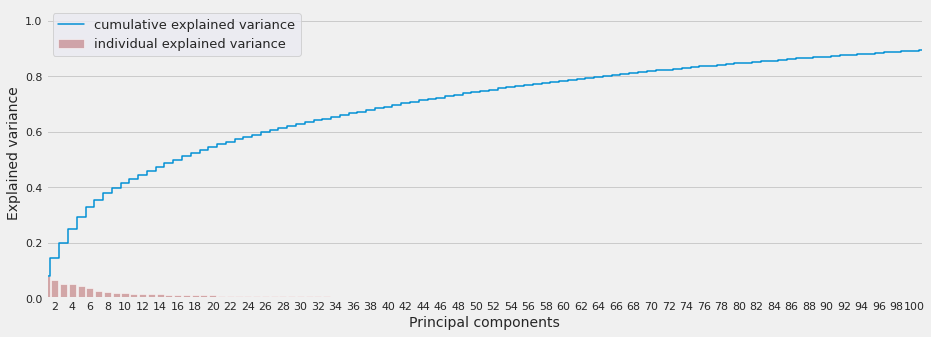

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=2)
plt.step(range(X.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,X.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'r',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

In [ ]:
pca = PCA(n_components=50)
matrix_9D = pca.fit_transform(X)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters['0'])


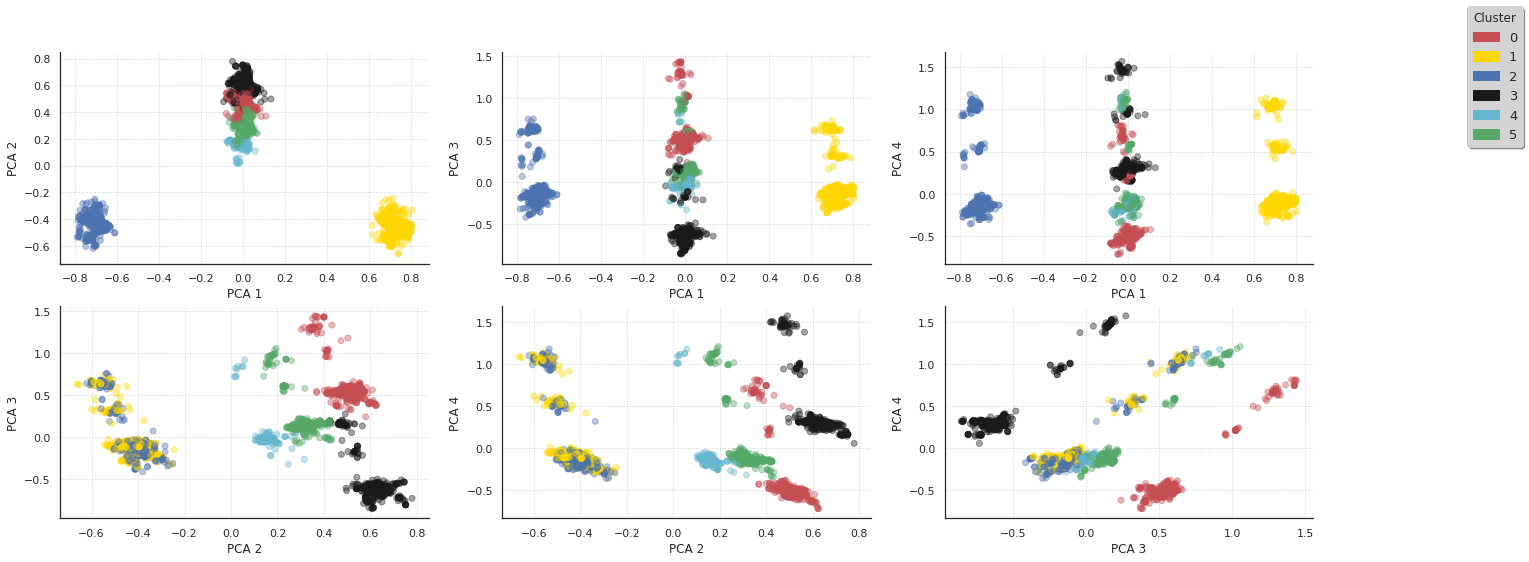

In [ ]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (20,8))
increment = 0
#
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(6):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

1,2 effect by pca 1
3 pca 2


cell error => library express issui in ymal
import plotly.express as px
from sklearn.decomposition import PCA

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]
clusters["0"]=clusters["0"].astype(str)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
   for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    matrix_9D,
    labels=labels,   
   dimensions=range(4),
  color=clusters["0"],
    #color_discrete_sequence=px.colors.qualitative.Antique  #int(label_color['color'])
)
fig.update_traces(diagonal_visible=False)
fig.show()

#Customer categories

In [ ]:
print(len(Descrip_unique))
print(len(clusters))

3845
3845


In [ ]:
#create new column called categ_product where I indicate the cluster of each product
corresp=dict()
for key, val in zip (Descrip_unique, clusters["0"]):
    corresp[key] = val 
#__________________________________________________________________________
df_cleaned1['categ_product'] = df_cleaned1.loc[:, 'Description'].map(corresp)

In [ ]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349301 entries, 0 to 349300
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         349301 non-null  object        
 1   StockCode         349301 non-null  object        
 2   Description       349301 non-null  object        
 3   Quantity          349301 non-null  int64         
 4   InvoiceDate       349301 non-null  datetime64[ns]
 5   UnitPrice         349301 non-null  float64       
 6   CustomerID        349301 non-null  object        
 7   Country           349301 non-null  object        
 8   Totalprice        349301 non-null  float64       
 9   QuantityCanceled  349301 non-null  int64         
 10  categ_product     349301 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 29.3+ MB


### Grouping products

In [ ]:
#option delete this
#create 6 column , each column indicates how much products from each cluster are sold
for i in range(6):
  col=f'categ_{i}'
  #filter dftemp each loop contains all invoice to cluster"i"
  df_temp = df_cleaned1[df_cleaned1['categ_product'] == i]
  price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
  #Get rid of the negativity price
  price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
  df_cleaned1.loc[:, col] = price_temp
  df_cleaned1[col].fillna(0, inplace = True)

In [ ]:
df_cleaned1[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4','categ_5']][:5]

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,3,0.00,0.0,0.0,15.3,0.0,0.0
1,536365,WHITE METAL LANTERN,0,20.34,0.0,0.0,0.0,0.0,0.0
2,536365,CREAM CUPID HEARTS COAT HANGER,0,22.00,0.0,0.0,0.0,0.0,0.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,0,20.34,0.0,0.0,0.0,0.0,0.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,0,20.34,0.0,0.0,0.0,0.0,0.0


In [ ]:


# Sum of purchases / user & order
temp = df_cleaned1.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['Totalprice'].sum()
basket_price = temp.rename(columns = {'Totalprice':'Basket Price'})
print(temp.head(3))
basket_price.head()




#==========================================
# percentage of the price of the order / product category
for i in range(6):
    col = f'categ_{i}'
    temp = df_cleaned1.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp[f'categ_{i}']
print(temp)
print(basket_price)



#===================================================
# date of the order
df_cleaned1['InvoiceDate_int'] = df_cleaned1['InvoiceDate'].astype('int64')
temp = df_cleaned1.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned1.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])


#===================================================
# selection of significant entries:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]


  CustomerID InvoiceNo  Totalprice
0      12346    541431    77183.60
1      12747    537215      358.56
2      12747    538537      347.71
      CustomerID InvoiceNo  categ_5
0          12346    541431     0.00
1          12747    537215   232.50
2          12747    538537   195.55
3          12747    541677   199.80
4          12747    545321    55.70
...          ...       ...      ...
16706      18283    579673     0.00
16707      18283    580872     0.00
16708      18287    554065    34.00
16709      18287    570715     0.00
16710      18287    573167     0.00

[16711 rows x 3 columns]
      CustomerID InvoiceNo  Basket Price  categ_0  categ_1   categ_2  categ_3  \
0          12346    541431      77183.60     0.00     0.00  77183.60     0.00   
1          12747    537215        358.56     0.00     0.00     80.16    45.90   
2          12747    538537        347.71     0.00     0.00     60.36    91.80   
3          12747    541677        303.04     0.00    10.20     27.04    66.00 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,InvoiceDate
0,12346,541431,77183.60,0.0,0.0,77183.60,0.00,0.00,0.00,2011-01-18 10:01:00
10,12747,577104,312.73,15.0,0.0,19.80,111.68,0.00,166.25,2011-11-17 17:13:00
9,12747,569397,675.38,0.0,0.0,54.08,313.20,0.00,308.10,2011-10-04 08:26:00
8,12747,563949,301.70,15.0,0.0,19.80,35.40,0.00,231.50,2011-08-22 10:38:00
7,12747,558265,376.30,15.0,0.0,0.00,143.20,12.75,205.35,2011-06-28 10:06:00


### split data over time

In [ ]:
print(basket_price['InvoiceDate'].min(), '->',  basket_price['InvoiceDate'].max())


#set_entrainement =>>set_training delete coment
#split data to set traing && set test
set_training = basket_price[basket_price['InvoiceDate'].dt.date < datetime.date(2011,10,1)]
set_test= basket_price[basket_price['InvoiceDate'].dt.date >= datetime.date(2011,10,1)]
basket_price = set_training.copy(deep = True)

2010-12-01 08:26:00 -> 2011-12-09 12:49:00


In [ ]:
basket_price

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,InvoiceDate
0,12346,541431,77183.60,0.0,0.00,77183.60,0.00,0.0,0.00,2011-01-18 10:01:00
1,12747,537215,358.56,0.0,0.00,80.16,45.90,0.0,232.50,2010-12-05 15:38:00
2,12747,538537,347.71,0.0,0.00,60.36,91.80,0.0,195.55,2010-12-13 10:41:00
3,12747,541677,303.04,0.0,10.20,27.04,66.00,0.0,199.80,2011-01-20 14:01:00
4,12747,545321,310.78,15.0,10.20,73.88,156.00,0.0,55.70,2011-03-01 14:53:00
...,...,...,...,...,...,...,...,...,...,...
16698,18283,557956,192.80,17.4,43.34,58.90,73.16,0.0,0.00,2011-06-23 19:20:00
16699,18283,560025,137.39,16.6,27.53,51.45,41.81,0.0,0.00,2011-07-14 13:00:00
16700,18283,560032,2.50,0.0,0.00,2.50,0.00,0.0,0.00,2011-07-14 13:20:00
16701,18283,565579,134.90,0.0,32.20,51.20,47.50,4.0,0.00,2011-09-05 12:35:00


في خطوة ثانية ، أقوم بتجميع الإدخالات المختلفة التي تتوافق مع نفس المستخدم. وبالتالي ، أحدد عدد عمليات الشراء التي قام بها المستخدم ، بالإضافة إلى الحد الأدنى والحد الأقصى ومتوسط المبالغ والمبلغ الإجمالي الذي تم إنفاقه خلال جميع الزيارات.

In [ ]:
#number of visits and stats on the amount of the basket / users
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(6):
    col = f'categ_{i}'
    #النسبة بين مشتريات كل عميل من فئة معين و اجمالي مشتريات العميل من كل الفئات
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100
transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
1,12747,8,301.70,442.96,346.175000,2769.40,3.489926,1.473243,17.281722,22.806384,2.036542,52.912183
2,12748,139,0.95,1948.35,139.576978,19401.20,13.699668,18.078779,24.722028,19.052945,6.664330,17.490516
3,12749,3,29.70,1866.43,918.410000,2755.23,18.934898,5.219891,23.759178,13.807922,15.672013,22.606098
4,12820,2,170.46,217.77,194.115000,388.23,16.652500,30.291322,15.403240,37.652938,0.000000,0.000000


أخيرا ،ننشأ متغيرين إضافيين يعطيان عدد الأيام المنقضية منذ الشراء الأول 
( First Buy ) 

وعدد الأيام منذ آخر عملية شراء 

(Last Buy ):

In [ ]:
#اتاريخ اخر عملية شراء
last_date = basket_price['InvoiceDate'].max().date()
# تاريخ أول عملية شراء و اخر عملية شراء لكل عميل
first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,LastPurchase,FirstPurchase
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,255,255
1,12747,8,301.70,442.96,346.175000,2769.40,3.489926,1.473243,17.281722,22.806384,2.036542,52.912183,39,299
2,12748,139,0.95,1948.35,139.576978,19401.20,13.699668,18.078779,24.722028,19.052945,6.664330,17.490516,0,303
3,12749,3,29.70,1866.43,918.410000,2755.23,18.934898,5.219891,23.759178,13.807922,15.672013,22.606098,60,143
4,12820,2,170.46,217.77,194.115000,388.23,16.652500,30.291322,15.403240,37.652938,0.000000,0.000000,4,256


فئة العملاء ذات الأهمية الخاصة هي فئة العملاء الذين يقومون بعملية شراء واحدة فقط. قد يكون أحد الأهداف ، على سبيل المثال ، استهداف هؤلاء العملاء من أجل الاحتفاظ بهم. في جزء منه ، أجد أن هذا النوع من العملاء يمثل 1/3 من العملاء المدرجين كما سوف نبين في جزء RFM : 

In [ ]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print(f'number of customers with a one-time purchase:{n1}/{n2}({n1/n2*100}%)')

number of customers with a one-time purchase:1310/3265(40.12251148545176%)


In [ ]:
transactions_per_user=transactions_per_user.sort_values('CustomerID', ascending = True)
transactions_per_user

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,LastPurchase,FirstPurchase
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,255,255
1,12747,8,301.70,442.96,346.175000,2769.40,3.489926,1.473243,17.281722,22.806384,2.036542,52.912183,39,299
2,12748,139,0.95,1948.35,139.576978,19401.20,13.699668,18.078779,24.722028,19.052945,6.664330,17.490516,0,303
3,12749,3,29.70,1866.43,918.410000,2755.23,18.934898,5.219891,23.759178,13.807922,15.672013,22.606098,60,143
4,12820,2,170.46,217.77,194.115000,388.23,16.652500,30.291322,15.403240,37.652938,0.000000,0.000000,4,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,18280,1,180.60,180.60,180.600000,180.60,34.634551,0.000000,0.000000,31.339978,0.000000,34.025471,207,207
3261,18281,1,80.82,80.82,80.820000,80.82,0.000000,18.708241,20.415739,18.930958,41.945063,0.000000,110,110
3262,18282,1,100.21,100.21,100.210000,100.21,13.471709,20.516914,22.901906,17.662908,25.446562,0.000000,56,56
3263,18283,10,2.50,192.80,108.683000,1086.83,8.106144,17.204163,35.549258,35.892458,0.547464,2.700514,25,267


In [ ]:
#stop here and save 

transactions_per_user.to_csv('/content/transactions_per_user_traning3265')

## Creation of customers categories

### Data encoding

يحتوي إطار البيانات transactions_per_user على ملخص لكافة الأوامر التي تم إنشاؤها. يتوافق كل إدخال في إطار البيانات هذا مع عميل معين. أستخدم هذه المعلومات لتوصيف الأنواع المختلفة من العملاء والاحتفاظ فقط بمجموعة فرعية من المتغيرات:

In [ ]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4','categ_5']
#_____________________________________________________________
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols]
type(matrix)
#matrix.head(1)

pandas.core.frame.DataFrame

في الممارسة العملية ، تحتوي المتغيرات المختلفة التي اخترتها على نطاقات مختلفة تماما من التباين وقبل مواصلة التحليل ، أقوم بإنشاء مصفوفة حيث يتم توحيد هذه البيانات:

In [ ]:
#Scaler
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)
scaled_matrix

variables mean values: 
------------------------------------------------------------------------------------------
 [  3.62909648 266.55457029 551.92064717 378.02776997  16.16545452
  13.9996578   24.86997804  21.22153696   7.03190563  16.63117963]


array([[-4.50052275e-01,  5.58364519e+01,  4.24791881e+01, ...,
        -1.23750858e+00, -5.15850921e-01, -9.93317653e-01],
       [ 7.48217150e-01,  2.55131497e-02, -6.04000834e-02, ...,
         9.24184649e-02, -3.66452987e-01,  2.16692755e+00],
       [ 2.31729735e+01, -1.92810537e-01,  7.74081759e-01, ...,
        -1.26458839e-01, -2.69648397e-02,  5.13249245e-02],
       ...,
       [-4.50052275e-01, -1.20754646e-01, -2.50396464e-01, ...,
        -2.07517203e-01,  1.35087387e+00, -9.93317653e-01],
       [ 1.09057984e+00, -1.91685344e-01, -1.99071111e-01, ...,
         8.55517227e-01, -4.75689735e-01, -8.32026114e-01],
       [-4.50052275e-01,  3.62040147e-01,  1.18271349e-01, ...,
        -2.11103916e-01, -5.15850921e-01, -7.27964866e-01]])

في ما يلي ، سأقوم بإنشاء مجموعات من العملاء.  قبل إنشاء هذه المجموعات ، من المثير للاهتمام تحديد قاعدة ذات أبعاد أصغر تسمح بوصف مصفوفة scaled_matrix. في هذه الحالة ، سأستخدم هذه القاعدة من أجل إنشاء تمثيل للمجموعات المختلفة وبالتالي التحقق من جودة فصل المجموعات المختلفة. لذلك أقوم بإجراء PCA مسبقا:

### PCA on customers categories

In [ ]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

وأنا أمثل مقدار التباين الذي يفسره كل مكون من المكونات:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



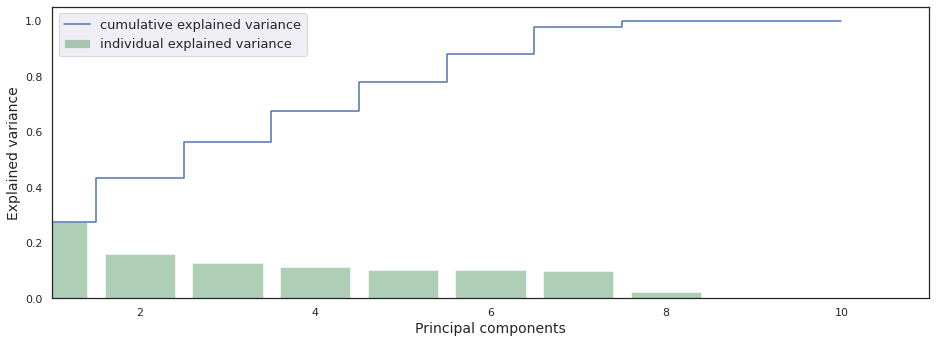

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

# clusters_clients

In [ ]:
#silhouette_avg=0.0
#while((silhouette_avg != .223)):
n_clusters = 10
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.223


In [ ]:
#clusters_clients=pd.DataFrame(clusters_clients)#numpy.ndarray
np.save('clusters_clients', clusters_clients)# saving the dataframe #clusters.to_numpy().T
clusters_clients =np.load('clusters_clients.npy')

In [ ]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['number of clients']).T

,2,8,4,1,6,0,7,5,9,3
number of clients,1454,410,369,303,284,251,154,34,5,1


هناك تفاوت معين في أحجام المجموعات المختلفة التي تم إنشاؤها. ومن ثم سأحاول الآن فهم محتوى هذه المجموعات من أجل التحقق من صحة (أو لا) هذا الفصل المحدد. في البداية ، أستخدم نتيجة PCA:

In [ ]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

a representation of the various clusters:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



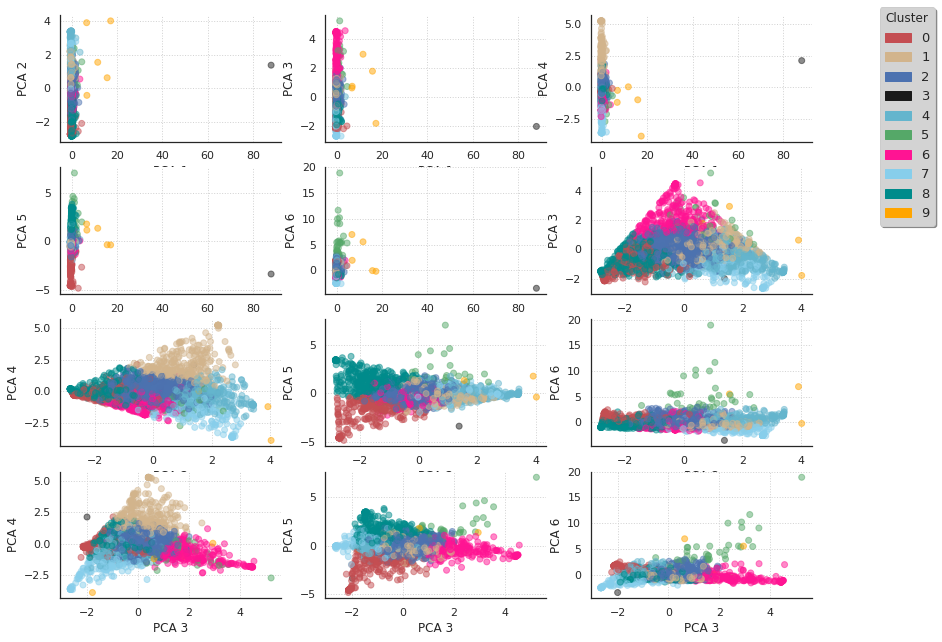

In [ ]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

In [ ]:
#import plotly.express as px
from sklearn.decomposition import PCA

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
#label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]
clusters_clients=clusters_clients.astype(str)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    matrix_3D,
    labels=labels,   
    dimensions=range(6),
    color=clusters_clients,
    #color_discrete_sequence=px.colors.qualitative.Antique  #int(label_color['color'])
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
 n_clusters = 10
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values,silhouette_avg, clusters_clients)

# Customer patterns

لفهم عادات العملاء في كل مجموعة.
 للقيام بذلك  ، أبدأ بإضافة متغير إلى إطار بيانات

 "selected_customers" يحدد المجموعة التي ينتمي إليها كل عميل:

In [ ]:
selected_customers.loc[:, 'cluster'] = clusters_clients
#selected_customers.info()
# Convert column to int dtype.
selected_customers['cluster'] = selected_customers['cluster'].astype('int')

In [ ]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    #info each cluster with edit) df.info()
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    #no. customer in each cluster
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

number of customers: 3265


In [ ]:
merged_df

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,LastPurchase,FirstPurchase,size
cluster,,,,,,,,,,,,,,
0.0,2.059761,248.950398,359.027211,299.134021,596.863307,6.318470,54.924286,19.013030,11.841546,1.811359,6.018480,95.752988,162.996016,251
7.0,2.220779,230.162662,366.696104,286.537878,690.561558,7.584736,4.365144,10.380324,9.463478,55.292497,12.906477,131.512987,185.266234,154
8.0,2.487805,243.593195,366.115490,301.079827,756.116539,7.055884,12.759437,57.890122,12.744277,2.783741,6.668802,104.463415,174.129268,410
1.0,2.145215,245.805083,394.292046,307.796626,767.421650,49.996861,6.353501,13.428723,14.349815,3.734254,12.033655,103.858086,164.973597,303
4.0,2.701897,210.428946,376.478835,283.817323,866.056913,12.621513,5.529412,11.631841,12.391526,6.859726,50.863389,118.303523,193.520325,369
6.0,3.102113,243.976056,478.255915,340.928744,1258.447606,6.985589,7.135867,15.293056,61.082434,2.080124,7.385951,95.165493,189.792254,284
2.0,4.050206,250.597635,567.374575,384.992822,1551.006624,16.992136,13.516548,25.777195,22.283476,5.632634,15.729497,76.103164,201.728336,1454
5.0,43.000000,36.271176,2395.026471,568.808772,22087.951471,17.010025,10.498244,21.172164,25.218973,8.758617,16.808256,13.647059,294.000000,34
3.0,1.000000,77183.600000,77183.600000,77183.600000,77183.600000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,255.000000,255.000000,1


سقوم بإعادة تنظيم محتوى إطار البيانات عن طريق ترتيب المجموعات المختلفة: أولا ، فيما يتعلق بالمبلغ في كل فئة من فئات المنتجات ، ثم ، وفقا للمبلغ الإجمالي الذي تم إنفاقه:

In [ ]:
# sort by categ_{i} , sum
liste_index = []
for i in range(6):
    column = f'categ_{i}'
    liste_index.append(merged_df[merged_df[column] > 45].index.values[0])
#___________________________________
liste_index_reordered = liste_index
liste_index_reordered += [ s for s in merged_df.index if s not in liste_index]
#___________________________________________________________
merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
display(merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0',
                   'categ_1', 'categ_2', 'categ_3', 'categ_4', 'categ_5', 'size']])

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,size
0,1.0,2.145215,245.805083,394.292046,307.796626,767.421650,49.996861,6.353501,13.428723,14.349815,3.734254,12.033655,303
1,0.0,2.059761,248.950398,359.027211,299.134021,596.863307,6.318470,54.924286,19.013030,11.841546,1.811359,6.018480,251
2,8.0,2.487805,243.593195,366.115490,301.079827,756.116539,7.055884,12.759437,57.890122,12.744277,2.783741,6.668802,410
3,6.0,3.102113,243.976056,478.255915,340.928744,1258.447606,6.985589,7.135867,15.293056,61.082434,2.080124,7.385951,284
4,7.0,2.220779,230.162662,366.696104,286.537878,690.561558,7.584736,4.365144,10.380324,9.463478,55.292497,12.906477,154
5,4.0,2.701897,210.428946,376.478835,283.817323,866.056913,12.621513,5.529412,11.631841,12.391526,6.859726,50.863389,369
6,2.0,4.050206,250.597635,567.374575,384.992822,1551.006624,16.992136,13.516548,25.777195,22.283476,5.632634,15.729497,1454
7,5.0,43.000000,36.271176,2395.026471,568.808772,22087.951471,17.010025,10.498244,21.172164,25.218973,8.758617,16.808256,34
8,3.0,1.000000,77183.600000,77183.600000,77183.600000,77183.600000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1
9,9.0,18.000000,1658.732000,25506.708000,8098.214505,91632.778000,11.622120,3.446971,18.102498,21.612615,21.405429,22.757834,5


In [ ]:
merged_df=pd.DataFrame(merged_df)
merged_df.to_csv('/content/merged_df_training', index=False, )# saving the dataframe 

I created a representation of the different pattern , I define a class to create "Radar Charts" 

In [ ]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

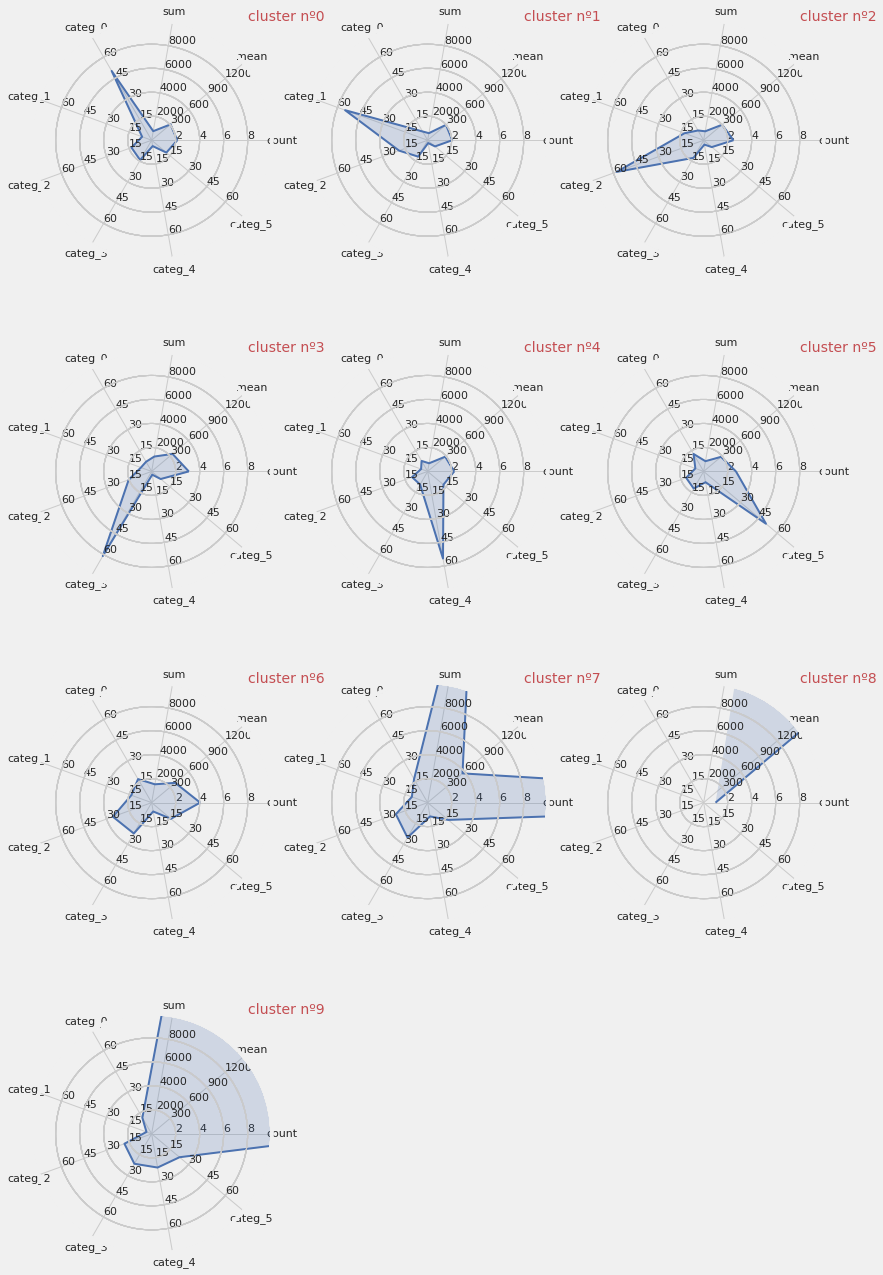

In [ ]:
fig = plt.figure(figsize=(10,12))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4', 'categ_5']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 

# Classification of customers

 الهدف هو ضبط مصنف يصنف المستهلكين في فئات 
 العملاء المختلفة التي تم إنشاؤها في السابق و محاولة جعل  هذا ممكنا من أول عملية شراء


وبما أن الهدف هو تحديد الفئة التي ينتمي إليها العميل وهذا بمجرد زيارته الأولى لذلك لا أحتفظ إلا بالمتغيرات التي تصف محتوى السلة، ولا تأخذ في الاعتبار المتغيرات المتعلقة بتكرار الزيارات أو تغيرات سعر السلة مع مرور الوقت:

In [ ]:
#class that allows to interface several of the functionalities common to these different classifiers
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
        # get the decision for all test examples
        #decision = self.clf.densify().decision_function(X_test)


    def predict(self, x):
        return self.clf.predict(x)

    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))

    def coef_(self):
        #self.grid.fit(X, Y)
        self.coef= self.grid.best_estimator_.coef_
        return self.coef
        #return self.grid.best_estimator_.coef_     

    def intercept_(self):
        #self.grid.fit(X, Y)
        self.coef= self.grid.best_estimator_.intercept_
        return self.coef
        #return self.grid.best_estimator_.coef_  

    def g_predict(self,X):
        #self.grid.fit(X, Y)
        self.predictions = self.grid.predict(X)
        return self.predictions

In [ ]:
k=['rbf', 'linear','poly','sigmoid']
c= [1,5,10,20,30,50,80,100]
g=[1e-7,1e-6,1e-5,1e-4,1e-2,0.0001]

param_grid=dict(kernel=k, C=c, gamma=g)
print (param_grid)
sc = svm.LinearSVC
sc= GridSearchCV(sc, param_grid,scoring='accuracy')
#svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)
sc.fit( X_train, Y_train)
sc.predict(X_test)

best_parameters = grid_search.best_estimator_

In [ ]:
#selected_customers.to_csv('/content/selected_customers_training', index=False, )# saving the dataframe 
#merged_df=pd.read_csv('/content/merged_df_training', encoding= 'unicode_escape')#1
selected_customers=pd.read_csv('/content/selected_customers_training', encoding= 'unicode_escape')#1


In [ ]:
# load selected_customers

In [ ]:
#select input & output
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' , 'categ_5']
X = selected_customers[columns]
Y = selected_customers['cluster']

## 1-Support Vector Machine Classifier

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

In [ ]:
from sklearn.svm import SVC
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.model_selection import GridSearchCV, learning_curve

In [ ]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)
svc.grid_fit(X = X_train, Y = Y_train)
preds=svc.grid_predict(X_test, Y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Precision: 90.66 % 


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
preds=svc.g_predict(X_test)
preds

### SVM Report

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_true=Y_test, y_pred=preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.92      1.00      0.96        65
           2       0.97      0.83      0.90       302
           3       0.00      0.00      0.00         1
           4       0.83      0.96      0.89        75
           5       0.00      0.00      0.00         3
           6       0.96      1.00      0.98        55
           7       0.61      1.00      0.76        19
           8       0.90      0.97      0.94        74
           9       0.00      0.00      0.00         0

    accuracy                           0.91       653
   macro avg       0.62      0.67      0.64       653
weighted avg       0.92      0.91      0.91       653



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

Report SVM

In [ ]:
preds=rf.g_predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_true=Y_test, y_pred=preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      0.97      0.98        65
           2       0.94      0.98      0.96       302
           3       0.00      0.00      0.00         1
           4       0.97      0.88      0.92        75
           5       0.00      0.00      0.00         3
           6       0.96      0.98      0.97        55
           7       0.90      1.00      0.95        19
           8       0.97      0.92      0.94        74

    accuracy                           0.96       653
   macro avg       0.75      0.75      0.75       653
weighted avg       0.95      0.96      0.95       653



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import pickle

In [ ]:

# save the model to disk
filename = 'SVM_V2_model.sav'
pickle.dump(svc, open(filename, 'wb'))
 
# load the model from disk
svc = pickle.load(open(filename, 'rb'))
result = svc.grid_predict(X_test, Y_test)

Precision: 90.66 % 


## Confusion matrix

In [ ]:

import itertools


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


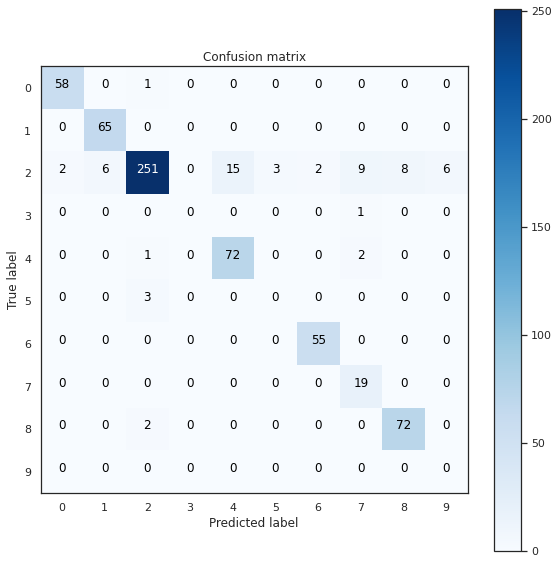

In [ ]:
#representation Confusion matrix
from sklearn.metrics import confusion_matrix
class_names = [i for i in range(10)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')

## learning curve

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
#represent the leanring curve of the SVC classifier

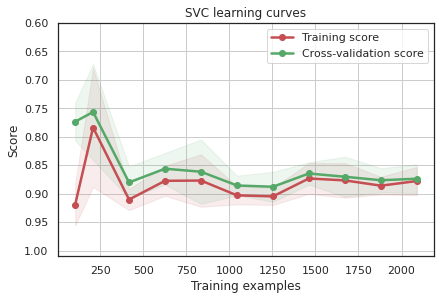

In [ ]:
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

## Logistic Regression

In [ ]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

Precision: 94.49 % 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



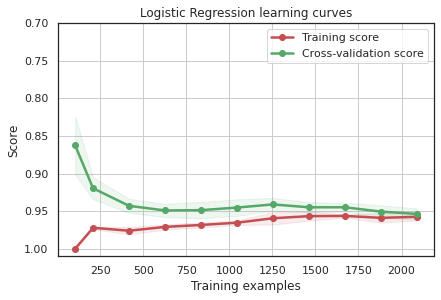

In [ ]:
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## k-Nearest Neighbors

In [ ]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 83.15 % 


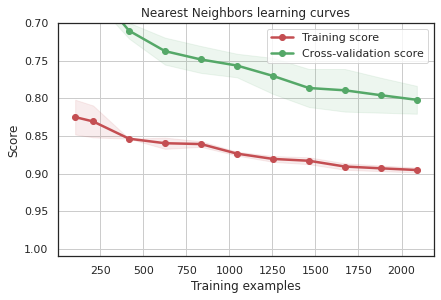

In [ ]:
g = plot_learning_curve(knn.grid.best_estimator_, "Nearest Neighbors learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Decision Tree

In [ ]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 92.04 % 


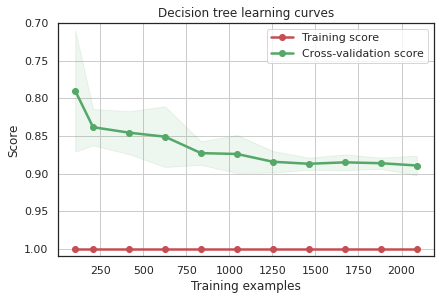

In [ ]:
g = plot_learning_curve(tr.grid.best_estimator_, "Decision tree learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Random Forest

In [ ]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 95.71 % 


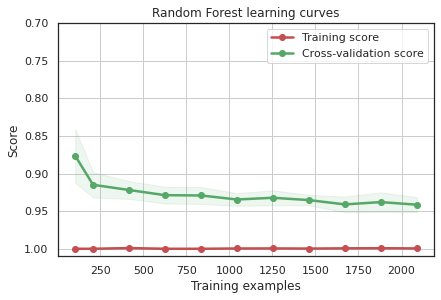

In [ ]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
preds=rf.g_predict(X_test)

In [ ]:
preds=rf.g_predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_true=Y_test, y_pred=preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       0.98      0.97      0.98        65
           2       0.95      0.98      0.96       302
           3       0.00      0.00      0.00         1
           4       0.97      0.89      0.93        75
           5       0.00      0.00      0.00         3
           6       0.96      0.98      0.97        55
           7       0.90      1.00      0.95        19
           8       0.97      0.92      0.94        74

    accuracy                           0.96       653
   macro avg       0.74      0.75      0.75       653
weighted avg       0.95      0.96      0.95       653



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 5)
ada.grid_fit(X = X_train, Y = Y_train)
ada.grid_predict(X_test, Y_test)

Precision: 58.65 % 


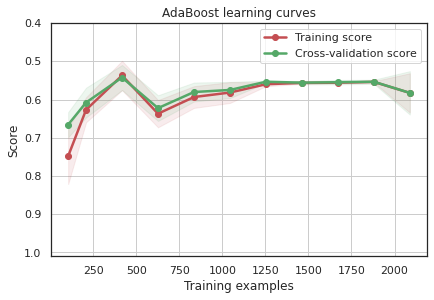

In [ ]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost learning curves", X_train, Y_train,
                        ylim = [1.01, 0.4], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Gradient Boosting Classifier

In [ ]:
gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)

Precision: 95.41 % 


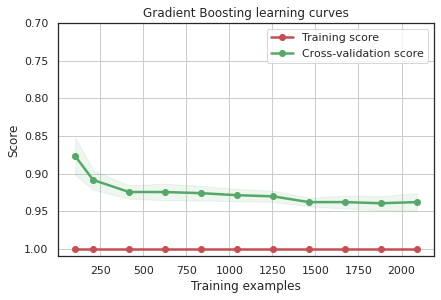

In [ ]:
g = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Let's vote

the different classifiers can be combined to improve the classification model. 

In [ ]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

In [ ]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best),
                                                ('knn', knn_best)], voting='soft') 

In [ ]:
#train voting model
votingC = votingC.fit(X_train, Y_train)

In [ ]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 94.95 % 


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_true=Y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        59
           1       0.98      0.95      0.97        65
           2       0.93      0.99      0.96       302
           3       0.00      0.00      0.00         1
           4       0.97      0.89      0.93        75
           5       0.00      0.00      0.00         3
           6       1.00      0.96      0.98        55
           7       0.90      1.00      0.95        19
           8       0.97      0.88      0.92        74
           9       0.00      0.00      0.00         0

    accuracy                           0.95       653
   macro avg       0.68      0.66      0.67       653
weighted avg       0.95      0.95      0.95       653



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

# Testing predictions

In [ ]:
#test the model the last two months of the dataset
basket_price = set_test.copy(deep = True)

إعادة تجميع إصلاح هذه البيانات وفقًا لنفس الإجراء المستخدم في مجموعة التدريب. ومع ذلك ، أقوم بتصحيح البيانات لأخذها في الاعتبار الفرق في الوقت الزمني بين مجموعتي البيانات والأوزان التي يحسبها المتغيرات ومجموعها للحصول على تكافؤ مع مجموعة التدريب:

In [ ]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(6):
    col = f'categ_{i}'
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()

#_______________________
# Correcting time range
transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum']   = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

CustomerID =>12346 
ده العميل الي موجود في كليستر لوحده

In [ ]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4','categ_5']
#_____________________________________________________________
matrix_test = transactions_per_user[list_cols].to_numpy()
scaled_test_matrix = scaler.transform(matrix_test)
scaled_test_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



numpy.ndarray

In [ ]:
Y = kmeans.predict(scaled_test_matrix)#numpy.ndarray
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4','categ_5' ]
X = transactions_per_user[columns]#dataframe

In [ ]:
transactions_per_user.to_csv('/content/transactions_per_user_SET_TEST', index=False, )# saving the dataframe 
np.save('transactions_per_user_SET_TEST_scaled',scaled_test_matrix)# saving numpy.ndarray

transactions_per_user =pd.read_csv('/content/transactions_per_user_SET_TEST', encoding= 'unicode_escape')#1
scaled_test_matrix =np.load('transactions_per_user_SET_TEST_scaled.npy')


X.to_csv('/content/X_Test', index=False, )# saving the dataframe 
np.save('Y_Test',Y)# saving numpy.ndarray
X=pd.read_csv('/content/X_Test', encoding= 'unicode_escape')#1
Y=np.load('Y_Test.npy')

In [ ]:
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logostic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Support Vector Machine
Precision: 83.66 % 
______________________________ 
Logostic Regression
Precision: 89.05 % 
______________________________ 
k-Nearest Neighbors
Precision: 77.41 % 
______________________________ 
Decision Tree
Precision: 84.44 % 
______________________________ 
Random Forest
Precision: 87.20 % 
______________________________ 
Gradient Boosting
Precision: 91.55 % 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, predictions)))

Precision: 93.58 % 


In [ ]:
import pickle
# save the model to disk
filename = 'votingC_V1_model'
pickle.dump(votingC , open(filename, 'wb'))
 
# load the model from disk
voting = pickle.load(open(filename, 'rb'))
prediction = voting.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, prediction)))

Precision: 93.58 % 


In [ ]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(votingC, 'votingC_V1_model.pkl')
 
# Load the model from the file
voting_joblib = joblib.load('votingC_V1_model.pkl')
prediction = voting_joblib.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, prediction)))

Precision: 93.58 % 


# Classification with tensorflow keras

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import RandomFourierFeatures#SVM
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Dropout, AlphaDropout, BatchNormalization,Concatenate, concatenate
from tensorflow.keras.optimizers import SGD, RMSprop, Adamax, Adagrad, Adam, Nadam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import *

In [ ]:
selected_customers=pd.read_csv('/content/selected_customers_training', encoding= 'unicode_escape')#1
X_test=pd.read_csv('/content/X_Test', encoding= 'unicode_escape')#1
Y_test=np.load('Y_Test.npy')

In [ ]:
#select input & output
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' , 'categ_5']
X_train = selected_customers[columns]
Y_train = selected_customers['cluster']

## DDN classifier

In [ ]:
def input_evaluation_set():
    features = {'mean': selected_customers['mean'].to_numpy(),
                'categ_0':  selected_customers['categ_0'].to_numpy(),
                'categ_1':  selected_customers['categ_1'].to_numpy(),
                'categ_2':  selected_customers['categ_2'].to_numpy(),
                'categ_3':  selected_customers['categ_3'].to_numpy(),
                'categ_4':  selected_customers['categ_4'].to_numpy(),
                'categ_5':  selected_customers['categ_5'].to_numpy()}
    labels = selected_customers['cluster'].to_numpy()
    return features, labels

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):#used in Train the Model
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)

In [ ]:
#select input & output
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' , 'categ_5']
X_train = selected_customers[columns]
Y_train = selected_customers['cluster']

In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in X_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

my_feature_columns

[NumericColumn(key='mean', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='categ_0', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='categ_1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='categ_2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='categ_3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='categ_4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='categ_5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [ ]:

# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier1 = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[128,64,32,10],#hidden_units=[128,64,32,10][30, 10]
    # The model must choose between 10 classes.
    n_classes=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpioh55utu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
# Train the Model.
classifier1.train(
    input_fn=lambda: input_fn(X_train, Y_train, training=True),
    steps=50000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpioh55utu/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 19.158882, step = 0
INFO:tensorflow:global_step/sec: 214.98
INFO:tensorflow:loss = 1.8306415, step = 100 (0.469 sec)
INFO:tensorflow:global_step/sec: 225.998
INFO:tensorflow:loss = 1.7053533, step = 200 (0.442 sec)
INFO:tensorflow:global_step/sec: 252.132
INFO:tensorflow:loss = 1.4447229, step = 300 (0.399 sec)
INFO:tensorflow:global_step/sec: 260.175
INFO:tensorflow:loss = 1.425735, step = 400 (0.384 sec)
INFO:tensorflow:global_step/sec: 254.636
INFO:tensorflow:loss = 1.3408976, step = 500 (0.390 sec)
INFO:ten

In [ ]:
#Evaluate the trained model
eval_result = classifier1.evaluate(
    input_fn=lambda: input_fn(X_train, Y_train, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-05-23T20:17:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpioh55utu/model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.38792s
INFO:tensorflow:Finished evaluation at 2022-05-23-20:17:56
INFO:tensorflow:Saving dict for global step 50000: accuracy = 0.96049005, average_loss = 0.1831172, global_step = 50000, loss = 0.18209982
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 50000: /tmp/tmpioh55utu/model.ckpt-50000

Test set accuracy: 0.960



In [ ]:
# Generate predictions from the model
# given test set 3 element and result the compare result y_true "expected" with predict" predictions"
expected = Y_test
predict_x = {
                 'mean': X_test['mean'].to_numpy(),
                'categ_0':  X_test['categ_0'].to_numpy(),
                'categ_1':  X_test['categ_1'].to_numpy(),
                'categ_2':  X_test['categ_2'].to_numpy(),
                'categ_3':  X_test['categ_3'].to_numpy(),
                'categ_4':  X_test['categ_4'].to_numpy(),
                'categ_5':  X_test['categ_5'].to_numpy(),
}

def input_fn(features, batch_size=256):
    """An input function for prediction."""
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predictions = classifier1.predict(
    input_fn=lambda: input_fn(predict_x))

In [ ]:
import numpy as np
categ = ['0', '1', '2','3','4','5','6','7','8','9']
preds=np.array([])
i=1
#prints a few predictions and their probabilities:
for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    preds=np.append (preds, int(categ[class_id]))
    

    print('Prediction is "{}" ({:.1f}%), expected "{}"'.format(
        categ[class_id], 100 * probability, expec))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpioh55utu/model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "4" (71.5%), expected "4"
Prediction is "4" (99.3%), expected "4"
Prediction is "2" (77.1%), expected "2"
Prediction is "2" (90.3%), expected "2"
Prediction is "2" (98.2%), expected "2"
Prediction is "7" (99.8%), expected "7"
Prediction is "2" (98.7%), expected "2"
Prediction is "2" (52.8%), expected "4"
Prediction is "2" (88.4%), expected "2"
Prediction is "4" (98.9%), expected "4"
Prediction is "1" (97.5%), expected "1"
Prediction is "0" (97.2%), expected "0"
Prediction is "8" (99.7%), expected "8"
Prediction is "7" (100.0%), expected "7"
Prediction is "2" (58.9%), expected "8"
Prediction is "2" (85.6%), expected "2"
Prediction is "8" (88.8%), expected "8"
Prediction is "1" (99.6%), expected "1"
Prediction

In [ ]:
print(expected)
print(preds)

2218    4
1449    4
1099    2
1168    2
905     2
       ..
684     0
446     8
407     2
797     0
1983    0
Name: cluster, Length: 653, dtype: int64
[4. 4. 2. 2. 2. 7. 2. 2. 2. 4. 1. 0. 8. 7. 2. 2. 8. 1. 2. 6. 2. 2. 2. 2.
 1. 2. 4. 4. 2. 2. 2. 2. 2. 2. 8. 2. 4. 2. 2. 2. 2. 4. 2. 2. 1. 2. 2. 2.
 8. 2. 2. 6. 2. 8. 0. 2. 0. 8. 0. 4. 2. 8. 6. 2. 8. 1. 2. 2. 6. 2. 1. 2.
 0. 8. 8. 2. 2. 6. 1. 2. 1. 2. 2. 2. 4. 2. 6. 2. 2. 8. 2. 2. 2. 2. 1. 2.
 0. 7. 1. 2. 4. 4. 2. 1. 2. 4. 6. 6. 6. 6. 2. 2. 4. 2. 2. 2. 2. 5. 4. 2.
 1. 6. 2. 2. 4. 2. 1. 2. 2. 1. 4. 7. 2. 2. 0. 2. 6. 2. 2. 2. 2. 8. 4. 0.
 4. 2. 0. 6. 2. 6. 2. 4. 4. 4. 2. 2. 5. 2. 2. 4. 8. 0. 1. 6. 0. 8. 1. 0.
 2. 2. 6. 2. 8. 6. 1. 2. 1. 6. 2. 1. 6. 8. 8. 2. 1. 8. 4. 8. 2. 1. 1. 2.
 0. 8. 2. 6. 2. 6. 7. 8. 4. 2. 0. 1. 2. 8. 1. 2. 2. 8. 2. 6. 0. 2. 2. 8.
 2. 4. 2. 1. 1. 2. 0. 2. 8. 4. 1. 1. 2. 2. 4. 4. 2. 2. 2. 2. 2. 2. 2. 1.
 6. 2. 1. 1. 2. 4. 4. 2. 8. 2. 2. 2. 6. 8. 1. 4. 0. 2. 1. 2. 1. 0. 2. 4.
 4. 2. 4. 2. 2. 2. 0. 2. 8. 2. 2. 2. 2. 2. 2. 

##result test of DNN classifier model

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_true=expected, y_pred=preds))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       1.00      0.98      0.99        65
           2       0.95      0.99      0.97       302
           3       0.00      0.00      0.00         1
           4       1.00      0.95      0.97        75
           5       0.00      0.00      0.00         3
           6       0.98      0.96      0.97        55
           7       0.86      1.00      0.93        19
           8       1.00      0.93      0.97        74

    accuracy                           0.97       653
   macro avg       0.75      0.75      0.75       653
weighted avg       0.96      0.97      0.96       653



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Prediction is "7" (69.3%), expected "3"
Prediction is "4" (62.7%), expected "4"
Prediction is "2" (60.4%), expected "5"
Prediction is "2" (90.3%), expected "2"
Prediction is "6" (46.2%), expected "2"
Prediction is "0" (39.7%), expected "0"
Prediction is "6" (62.4%), expected "6"
Prediction is "4" (100.0%), expected "4"
Prediction is "2" (82.4%), expected "8"
Prediction is "1" (56.8%), expected "1"
Prediction is "5" (76.9%), expected "7"
Prediction is "1" (95.2%), expected "2"
Prediction is "2" (57.2%), expected "6"
Prediction is "1" (46.2%), expected "2"
Prediction is "2" (67.5%), expected "4"

In [ ]:
categ[class_id]

'0'

In [ ]:
type(categ[class_id])
len(categ[class_id])

1

### Save DNN Classifier and convert model.pb to tflite

In [ ]:
# Save DNNclassivier model
feature_spec = tf.feature_column.make_parse_example_spec(my_feature_columns)

export_input_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec)

servable_model_dir = "/content/DNN_model"

servable_model_path = classifier1.export_saved_model(servable_model_dir, export_input_fn)

#classifier1.export_saved_model('/content/DNN_model',)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: ['serving_default', 'classification']
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:Restoring parameters from /tmp/tmpioh55utu/model.ckpt-50000
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /content/DNN_model/temp-1653337077/saved_model.pb


In [ ]:
servable_model_path

b'/content/DNN_model/1653337077'

In [ ]:
# Converting a SavedModel.
#solution 2
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(
    servable_model_path)

converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)


fo = open(
     "/content/DNN_model/model.tflite", "wb")
fo.write(tflite_model)
fo.close

INFO:tensorflow:Restoring parameters from /content/DNN_model/1653337077/variables/variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'predict', 'serving_default', 'classification'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: inputs
INFO:tensorflow: tensor name: input_example_tensor:0, shape: (-1), type: DT_STRING
INFO:tensorflow:output tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: classes
INFO:tensorflow: tensor name: head/Tile:0, shape: (-1, 10), type: DT_STRING
INFO:tensorflow:Tensor's key in saved_model's tensor_map: scores
INFO:tensorflow: tensor name: head/predictions/probabilities:0, shape: (-1, 10), type: DT_FLOAT
INFO:tensorflow:Restoring parameters from /content/DNN_model/1653337077/variables/variables
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util

<function BufferedWriter.close>

In [ ]:
#=====================================================================
# convert DNN classifier model to tflite
import tensorflow as tf
#solution 1
saved_model_dir = "/content/DNN_model/1653290705"
converter = tf.lite.TFLiteConverter.from_saved_model(
    saved_model_dir, signature_keys=['serving_default'])
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

fo = open(
    "/content/DNN_model/model.tflite", "wb")
fo.write(tflite_model)
fo.close